## DLE602 Assesment 1 - Programming Problems
### Dataset 1
#### Martin, Jasper
#### A00093437

##### Github Repository: https://github.com/jaspervanbrian/twitter-sentiment-analysis-using-n-gram-model
##### Dataset Link: https://www.kaggle.com/datasets/kazanova/sentiment140

## Step 1: Import data and libraries

In [86]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.util import bigrams

nltk.download('stopwords')
nltk.download('punkt')

data = pd.read_csv('archive/training.1600000.processed.noemoticon.csv', on_bad_lines='skip', encoding='latin-1')

data.reset_index(drop=True, inplace=True)

pd.set_option('max_colwidth', 140)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Quick Data eval

In [87]:
def show_sentiment_graph(collection, title):
  ax = collection['sentiment'].value_counts().sort_index().plot(kind='bar', title=title)
  ax.set_xlabel('Sentiment')
  plt.show()

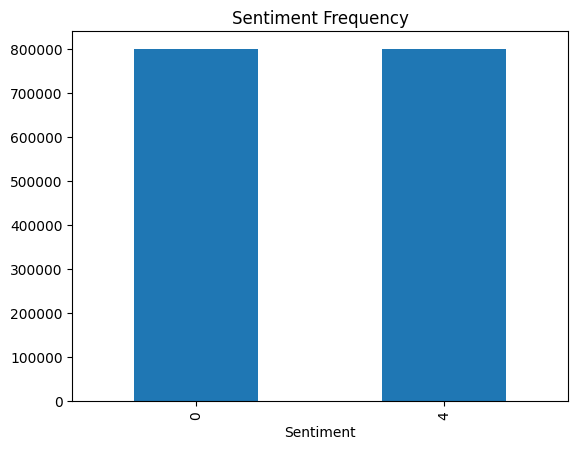

In [88]:
show_sentiment_graph(data, "Sentiment Frequency")

## Step 2: Preprocess data

In [107]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

def preprocess_tweets(tweets):
    return [preprocess_text(row[6]) for row in tweets.itertuples(name=None)]

In [108]:
data['text'] = preprocess_tweets(data)

In [109]:
data

,sentiment,id,timestamp,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww thats bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry result school today also blah
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,woke school best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready mojo makeover ask details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru shakur


## Step 3: Split and train data

In [110]:
# Create an instance of CountVectorizer with bigram range
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer on the preprocessed text data
X = vectorizer.fit_transform(data['text'])

In [111]:
# Sentiments as y
y = data['sentiment']

In [112]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [116]:
# Evaluate model performance (replace with desired evaluation metrics)
from sklearn.metrics import accuracy_score
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.74


## Step 4: Test Model

In [131]:
# Use the trained model to predict sentiment on new tweets
def test_tweet(tweet):
    cleaned_tweet = preprocess_text(tweet)
    new_bigram_vectorized = vectorizer.transform([cleaned_tweet])
    predicted_sentiment = classifier.predict(new_bigram_vectorized)[0]
    
    if predicted_sentiment == 4:
      print(f"Predicted Sentiment for '{tweet}': Positive")
    elif predicted_sentiment == 0:
      print(f"Predicted Sentiment for '{tweet}': Negative")

tweets = ["This new phone is amazing!", "this sucks", "I want to live forever", "The war is coming", "I feel awesome", "The House Always Wins"]

for tweet in tweets:
    test_tweet(tweet)

Predicted Sentiment for 'This new phone is amazing!': Positive
Predicted Sentiment for 'this sucks': Negative
Predicted Sentiment for 'I want to live forever': Negative
Predicted Sentiment for 'The war is coming': Negative
Predicted Sentiment for 'I feel awesome': Positive
Predicted Sentiment for 'The House Always Wins': Positive
